In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import sys
np.set_printoptions(threshold=sys.maxsize)

In [56]:
image = np.genfromtxt('mat.csv', delimiter=';')
print(image)
h,w = image.shape
imageG = np.zeros([h,w])
imageG= cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_REFLECT)
print(imageG)

[[  0.  12.  53.  32. 190.  53. 174.  53.]
 [ 57.  32.  12. 227. 219. 202.  32. 154.]
 [ 65.  85.  93. 239. 251. 227.  65. 158.]
 [ 73. 146. 146. 247. 255. 235. 154. 130.]
 [ 97. 166. 117. 231. 243. 210. 117. 117.]
 [117. 190.  36. 146. 178.  93.  20. 170.]
 [130. 202.  73.  20.  12.  53.  85. 194.]
 [146. 206. 130. 117.  85. 166. 182. 215.]]
[[  0.   0.  12.  53.  32. 190.  53. 174.  53.  53.]
 [  0.   0.  12.  53.  32. 190.  53. 174.  53.  53.]
 [ 57.  57.  32.  12. 227. 219. 202.  32. 154. 154.]
 [ 65.  65.  85.  93. 239. 251. 227.  65. 158. 158.]
 [ 73.  73. 146. 146. 247. 255. 235. 154. 130. 130.]
 [ 97.  97. 166. 117. 231. 243. 210. 117. 117. 117.]
 [117. 117. 190.  36. 146. 178.  93.  20. 170. 170.]
 [130. 130. 202.  73.  20.  12.  53.  85. 194. 194.]
 [146. 146. 206. 130. 117.  85. 166. 182. 215. 215.]
 [146. 146. 206. 130. 117.  85. 166. 182. 215. 215.]]


[[170 187 206 189 185 184 191 193 190 162 122  50  22  21  10  16  19  20
   18  24  19  14  15  17  18   8   9   8   6   2   2   3   2  17  17  11
    4   4  15  19   6   8  16  21  15  34   6   9  13  19  22  22  13  29
   16  29  13  14  17  16  16  17  19  15  12  15  14  20  14  13  14  17
   15  17  21  20  18  15  18  18  12   3   1   1   8   8   8   3   9  20
   11   7  11  15  14  12  15  11  14  10   6  10   8  13  54  94  49 140
   87  71 128 152 165 177 159 150 176 201 180 112  94  81  87  95  98 127
  139 131]
 [197 127 186 206 197 195 195 172 171 134  49  22  23  10   8  11  17  26
   35  35  33  27  22  23  21  17  15  10  11   4   2   1   4  12  20  13
    5   2   6  25  10  11  25  23  18  28  10  17  26  20  21  26  20  24
   18  28  10  17  21  23  26  17  22  22  27  34  34  26  32  28  25  34
   23  25  15   9  16  13  14   7   4   5   1   2   4   6   7   8  10   5
   12  13   8   8  14  16  10   8   5   6   6   6   3   3  20  97  59 103
   79 128 120 131 206 180 1

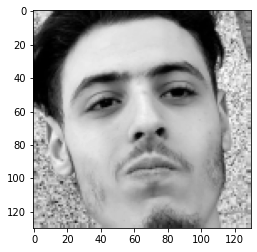

In [57]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('seif.jpg',0)
faces = face_cascade.detectMultiScale(img, 1.4, 4)
for (x, y, w, h) in faces:
    faces = img[y:y + h, x:x + w]
    cv2.imwrite('face1.jpg', faces)
face1 = cv2.imread('face1.jpg',0)
face1 = cv2.resize(face1,(128,128),interpolation = cv2.INTER_AREA)
cv2.imwrite('face1.jpg',face1)
h,w = face1.shape[:2]
print(face1)
print(h,w)

imageG = cv2.copyMakeBorder(face1,1,1,1,1,cv2.BORDER_REFLECT)
plt.imshow(imageG,cmap='gray')
height,width = imageG.shape[:2]
print(height,width)

In [58]:
#gradient x
def gradientX(image):
    gx = np.zeros([h,w])
    for p in range(1,w+1) :
        for l in range(1,h+1) :
            gx[l-1,p-1] = int(image[l+1,p]) - int(image[l-1,p])
    return gx
gx = gradientX(imageG)
print(gx)

[[  27.  -60.  -20.   17.   12.   11.    4.  -21.  -19.  -28.  -73.  -28.
     1.  -11.   -2.   -5.   -2.    6.   17.   11.   14.   13.    7.    6.
     3.    9.    6.    2.    5.    2.    0.   -2.    2.   -5.    3.    2.
     1.   -2.   -9.    6.    4.    3.    9.    2.    3.   -6.    4.    8.
    13.    1.   -1.    4.    7.   -5.    2.   -1.   -3.    3.    4.    7.
    10.    0.    3.    7.   15.   19.   20.    6.   18.   15.   11.   17.
     8.    8.   -6.  -11.   -2.   -2.   -4.  -11.   -8.    2.    0.    1.
    -4.   -2.   -1.    5.    1.  -15.    1.    6.   -3.   -7.    0.    4.
    -5.   -3.   -9.   -4.    0.   -4.   -5.  -10.  -34.    3.   10.  -37.
    -8.   57.   -8.  -21.   41.    3.  -38.  -35.    3.  -17.   10.   33.
   -22.  -13.   -1.   15.   10.  -16.    0.    5.]
 [  31.  -21.   -3.    0.    8.   10.   -6.  -27.  -48.  -99.  -91.  -28.
    -4.   -6.   16.   10.    4.   -3.   -6.  -14.   -4.   -2.   -5.    0.
    -9.    0.    1.    7.    5.   10.    9.    0.    0.   -9.

In [59]:
#gradient y
def gradientY(image):
    gy = np.zeros([h,w])
    for l in range(1,h+1) :
        for p in range(1,w+1) :
            gy[l-1,p-1] = int(imageG[l,p+1]) - int(imageG[l,p-1])
    return gy
gy = gradientY(imageG)
print(gy)

[[  17.   36.    2.  -21.   -5.    6.    9.   -1.  -31.  -68. -112. -100.
   -29.  -12.   -5.    9.    4.   -1.    4.    1.  -10.   -4.    3.    3.
    -9.   -9.    0.   -3.   -6.   -4.    1.    0.   14.   15.   -6.  -13.
    -7.   11.   15.   -9.  -11.   10.   13.   -1.   13.   -9.  -25.    7.
    10.    9.    3.   -9.    7.    3.    0.   -3.  -15.    4.    2.   -1.
     1.    3.   -2.   -7.    0.    2.    5.    0.   -7.    0.    4.    1.
     0.    6.    3.   -3.   -5.    0.    3.   -6.  -15.  -11.   -2.    7.
     7.    0.   -5.    1.   17.    2.  -13.    0.    8.    3.   -3.    1.
    -1.   -1.   -1.   -8.    0.    2.    3.   46.   81.   -5.   46.   38.
   -69.   41.   81.   37.   25.   -6.  -27.   17.   51.    4.  -89.  -86.
   -31.   -7.   14.   11.   32.   41.    4.   -8.]
 [ -70.  -11.   79.   11.  -11.   -2.  -23.  -24.  -38. -122. -112.  -26.
   -12.  -15.    1.    9.   15.   18.    9.   -2.   -8.  -11.   -4.   -1.
    -6.   -6.   -7.   -4.   -6.   -9.   -3.    2.   11.   16.

In [60]:
#Magnitude
def magnitude(gx,gy):
    m = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            m[l,p]= math.sqrt( gx[l,p]**2 + gy[l,p]**2 )
    return m
m = magnitude(gx,gy)
print(m)

[[ 31.90611227  69.97142274  20.09975124  27.01851217  13.
   12.52996409   9.8488578   21.02379604  36.35931793  73.53910524
  133.68993979 103.84603989  29.01723626  16.2788206    5.38516481
   10.29563014   4.47213595   6.08276253  17.4642492   11.04536102
   17.20465053  13.60147051   7.61577311   6.70820393   9.48683298
   12.72792206   6.           3.60555128   7.81024968   4.47213595
    1.           2.          14.14213562  15.8113883    6.70820393
   13.15294644   7.07106781  11.18033989  17.49285568  10.81665383
   11.70469991  10.44030651  15.8113883    2.23606798  13.34166406
   10.81665383  25.3179778   10.63014581  16.40121947   9.05538514
    3.16227766   9.8488578    9.89949494   5.83095189   2.
    3.16227766  15.29705854   5.           4.47213595   7.07106781
   10.04987562   3.           3.60555128   9.89949494  15.
   19.10497317  20.61552813   6.          19.31320792  15.
   11.70469991  17.02938637   8.          10.           6.70820393
   11.40175425   5.38516481

In [65]:
#direction
def direction(gx,gy):
    d = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            # d[l,p]= math.floor(math.degrees(math.atan( gy[l,p] / gx[l,p])))
            d[l,p]= math.floor(math.degrees(np.arctan2( gy[l,p],gx[l,p])))
            if d[l,p] < 0 :
                d[l,p] %= 360
    return d
d = direction(gx,gy)
d = d.ravel() 
print(d)

[ 32. 149. 174. 308. 337.  28.  66. 182. 238. 247. 236. 254. 271. 227.
 248. 119. 116. 350.  13.   5. 324. 342.  23.  26. 288. 315.   0. 303.
 309. 296.  90. 180.  81. 108. 296. 278. 278. 100. 120. 303. 289.  73.
  55. 333.  77. 236. 279.  41.  37.  83. 108. 293.  45. 149.   0. 251.
 258.  53.  26. 351.   5.  90. 326. 315.   0.   6.  14.   0. 338.   0.
  19.   3.   0.  36. 153. 195. 248. 180. 143. 208. 241. 280. 270.  81.
 119. 180. 258.  11.  86. 172. 274.   0. 110. 156. 270.  14. 191. 198.
 186. 243.   0. 153. 149. 102. 112. 300.  77. 134. 263.  35.  95. 119.
  31. 296. 215. 154.  86. 166. 276. 290. 234. 208.  94.  36.  72. 111.
  90. 302. 293. 207.  92.  90. 306. 348. 255. 221. 218. 230. 230. 222.
 251. 248.   3.  41.  75.  99. 123. 188. 243. 259. 218. 270. 213. 270.
 278. 330. 309. 318. 341.  90.  90. 119.  45. 262. 280.  45. 117.  23.
 296.  56.  47. 285.  32. 270. 337.  63.   8. 291.  50. 341. 351. 270.
  14. 237. 309.  28.  20.  11. 341. 347.  11.   7.  15.  12. 345. 355.
   3. 

[2481 1933 2058 1624 2170 2011 2131 1976]
[  0  45  90 135 180 225 270 315 360]


(array([2481., 1933., 2058., 1624., 2170., 2011., 2131., 1976.]),
 array([  0,  45,  90, 135, 180, 225, 270, 315, 360]),
 <BarContainer object of 8 artists>)

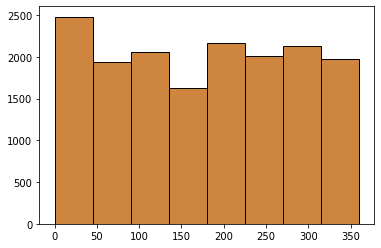

In [66]:
bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
np.histogram(d, bins = bins)
hist, bins = np.histogram(d, bins = bins)
print (hist) 
print (bins) 
plt.hist(d,bins=bins, color='peru', ec = 'black')
